
### By Jonathan Kastelan
## NYU CUSP PUI
### Homework 3 - Assignment 1 


Question:

GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

Describe the behavior you see in the plots in terms of the law of large numbers.

PLOT the distributions of all sample means (together for all distributions). 

Mandatory: as a histogram. Optional: in any other way you think is convincing 

Extra Credit: FIT a gaussian to the distribution of means



In [1]:
from __future__ import print_function, division
__author__= 'JKtours'


import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
#from scipy.stats import beta
import numpy as np
np.random.seed(seed=1000)
    
%pylab inline

distributions = ['gaus', 'pois', 'chisq', 'binomial', 'uniform']


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## The selected distributions are Gaussian (Normal), Poisson, Chi-squared, Binomial and Uniform distributions

## The selected mean is 9999

Generate array of sample sizes (in this case we have drawn sample sizes as the integer from an exponential distribution)

In [2]:
mymean = 9999

samplesizes = (np.random.exponential(scale=.5, size = 150) * 1990 + 10).astype(int)
sorteduniqueSS = array(sorted(set(i for i in samplesizes if i <= 2000) ))
mysize = array(sorted(np.random.choice(sorteduniqueSS, 100, replace=False)))
mysize

array([  20,   28,   39,   41,   45,   51,   55,   56,   73,   85,   87,
        108,  122,  146,  151,  152,  162,  183,  208,  210,  236,  240,
        247,  249,  267,  274,  275,  279,  289,  300,  328,  329,  346,
        376,  379,  390,  396,  397,  399,  422,  437,  451,  456,  465,
        513,  515,  534,  544,  552,  573,  580,  583,  586,  588,  593,
        597,  603,  619,  641,  664,  726,  737,  739,  755,  777,  779,
        785,  786,  813,  824,  826,  840,  925,  976,  978,  999, 1075,
       1079, 1147, 1149, 1166, 1179, 1201, 1204, 1215, 1230, 1295, 1359,
       1386, 1409, 1421, 1453, 1581, 1601, 1623, 1624, 1694, 1746, 1844,
       1879])

## Defining parameters of respective distributions

Gaussian: Mean = 9,999; Standard Deviation = 100

Poisson: Mean = Variance = 9,999 

Chi-squared: degrees of freedom = mean = 9,999

Binomial: n = 100; p = 100 / 9,999

Uniform: B = 1,9991; A = 7


In [3]:
#gaus
gausMean = mymean
gausSpread = 100

#pois
poisLambda = mymean

#Chisquare
ChiDf = mymean

#Binomial
binN = 100000
binP = mymean/100000

#Uniform
UniB = 19991
UniA = 2 * mymean - UniB




In [4]:

distributionSamples = {}

for i in distributions: 
    distributionSamples[i] = {}
# md is an empty dictionary

for n in mysize:
    distributionSamples['gaus'][n] = np.random.normal(gausMean, gausSpread, size = n)
    distributionSamples['pois'][n] = np.random.poisson(poisLambda, size = n)
    distributionSamples['chisq'][n] = np.random.chisquare(ChiDf, size = n)
    distributionSamples['binomial'][n] = np.random.binomial(binN, binP, size = n)
    distributionSamples['uniform'][n] = np.random.uniform(UniA, UniB, size = n)



# By distribution, calculate means of all the samples in the dictionary



### Normal distribution¶


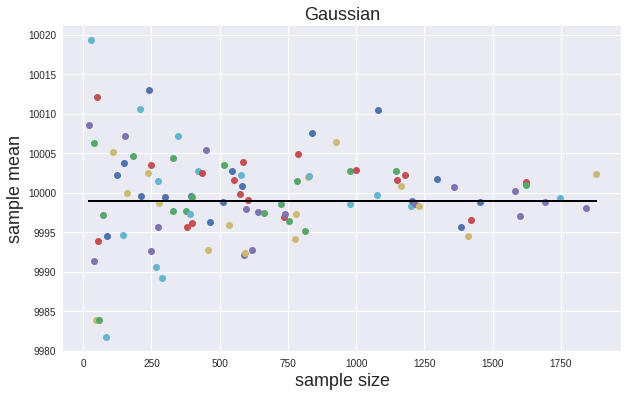

In [5]:
# save the means for plotting later    

distributionSamples['gaus']['means'] = {}
axgaus_mu_sigma = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in distributionSamples['gaus']:
    if not type(nn) == str:
        distributionSamples['gaus']['means'][nn] = distributionSamples['gaus'][nn].mean()
        #and plot it
        axgaus_mu_sigma.plot(nn, distributionSamples['gaus']['means'][nn], 'o')
        axgaus_mu_sigma.set_xlabel('sample size', fontsize=18)
        axgaus_mu_sigma.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_sigma.set_title('Gaussian', fontsize=18)
        axgaus_mu_sigma.plot([min(mysize), max(mysize)], [gausMean, gausMean], 'k')

##### Figure 1:  Plot of sample means vs sample size for 100 randomly generated samples of Gaussian distribution (each with randomly generated sample size).

As sample size increases, the sample means converge closer to the overall mean of the distribution which the samples were originally generated from ('population mean')

### Poisson distribution¶

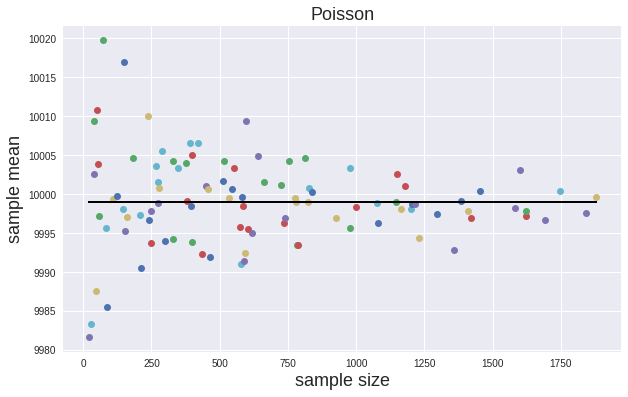

In [6]:
# save the means for plotting later    

distributionSamples['pois']['means'] = {}
axpois_lambda = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in distributionSamples['pois']:
    if not type(nn) == str:
        distributionSamples['pois']['means'][nn] = distributionSamples['pois'][nn].mean()
        #and plot it
        axpois_lambda.plot(nn, distributionSamples['pois']['means'][nn], 'o')
        axpois_lambda.set_xlabel('sample size', fontsize=18)
        axpois_lambda.set_ylabel('sample mean', fontsize=18)
        axpois_lambda.set_title('Poisson', fontsize=18)
        axpois_lambda.plot([min(mysize), max(mysize)], [poisLambda, poisLambda], 'k')

##### Figure 2: Plot of sample means vs sample size for 100 randomly generated samples of Poisson distribution (each with randomly generated sample size).

Similar to Figure 1 above, as sample size increases, the sample means converge closer to the overall mean of the distribution which the samples were originally generated from ('population mean')


### Chi-squared distribution

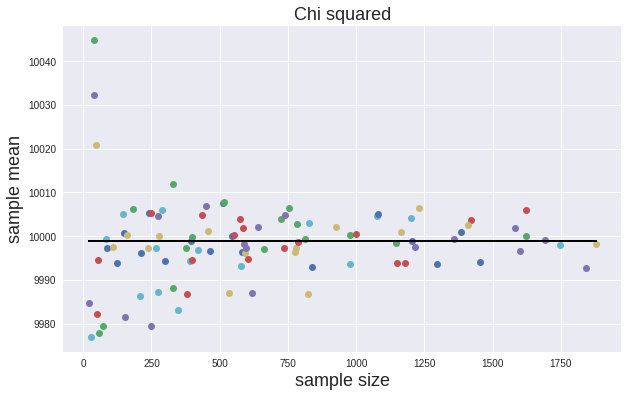

In [7]:
# save the means for plotting later    

distributionSamples['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in distributionSamples['chisq']:
    if not type(nn) == str:
        distributionSamples['chisq']['means'][nn] = distributionSamples['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, distributionSamples['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [ChiDf, ChiDf], 'k')

##### Figure 3: Plot of sample means vs sample size for 100 randomly generated samples of Chi-squared distribution (each with randomly generated sample size).

Similar to the previous two distributions, as sample size increases, the sample means converge closer to the overall mean of the distribution which the samples were originally generated from ('population mean')

### Binomial distribution

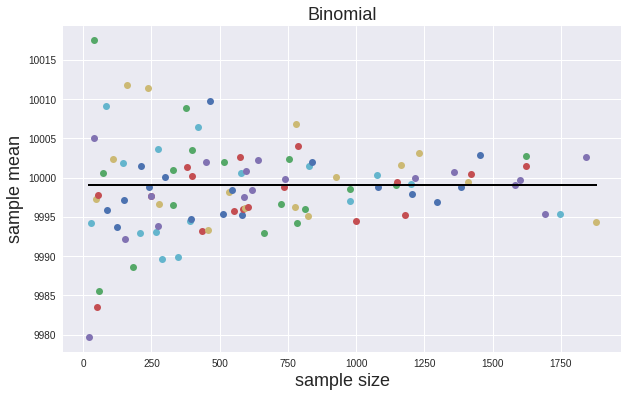

In [8]:
# save the means for plotting later    

distributionSamples['binomial']['means'] = {}
axbinomial_n_p = pl.figure(figsize=(10,6)).add_subplot(111)

binMean = binN * binP

for nn in distributionSamples['binomial']:
    if not type(nn) == str:
        distributionSamples['binomial']['means'][nn] = distributionSamples['binomial'][nn].mean()
        #and plot it
        axbinomial_n_p.plot(nn, distributionSamples['binomial']['means'][nn], 'o')
        axbinomial_n_p.set_xlabel('sample size', fontsize=18)
        axbinomial_n_p.set_ylabel('sample mean', fontsize=18)
        axbinomial_n_p.set_title('Binomial', fontsize=18)
        axbinomial_n_p.plot([min(mysize), max(mysize)], [binMean, binMean], 'k')
        


##### Figure 4: Plot of sample means vs sample size for 100 randomly generated samples of Binomial distribution (each with randomly generated sample size). Binomial distributions have parameters n = 100,000, p = 0.09999

Similar to the previous distributions, as sample size increases, the sample means converge closer to the overall mean of the distribution which the samples were originally generated from ('population mean'). This distribution appears to be the most variable for larger sample sizes, compared to the previous distributions.

### Uniform distribution

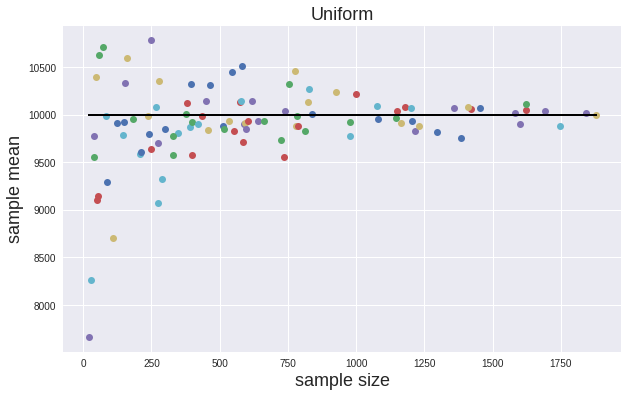

In [9]:
# save the means for plotting later    

distributionSamples['uniform']['means'] = {}
axuniform_A_B = pl.figure(figsize=(10,6)).add_subplot(111)

UniMean = 0.5 * (UniA + UniB)

for nn in distributionSamples['uniform']:
    if not type(nn) == str:
        distributionSamples['uniform']['means'][nn] = distributionSamples['uniform'][nn].mean()
        #and plot it
        axuniform_A_B.plot(nn, distributionSamples['uniform']['means'][nn], 'o')
        axuniform_A_B.set_xlabel('sample size', fontsize=18)
        axuniform_A_B.set_ylabel('sample mean', fontsize=18)
        axuniform_A_B.set_title('Uniform', fontsize=18)
        axuniform_A_B.plot([min(mysize), max(mysize)], [UniMean, UniMean], 'k')

##### Figure 4: Plot of sample means vs sample size for 100 randomly generated samples of Uniform distribution (each with randomly generated sample size). Uniform distributions have parameters Lower = 7; Upper = 19,991

Similar to the previous four distributions, as sample size increases, the sample means converge closer to the overall mean of the distribution which the samples were originally generated from ('population mean'). This distribution is highly variable, and particularly skewed by the low sample sizes.


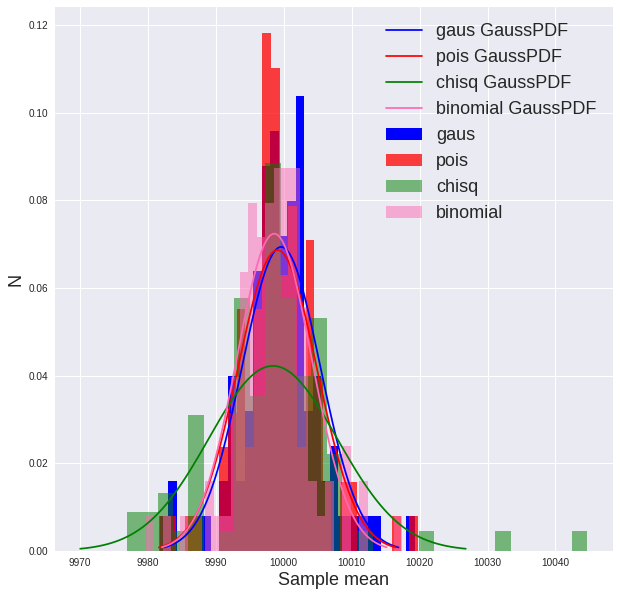

In [10]:

allmeans = list(np.zeros(len(distributions)))
a = 0


for i in distributions:
    allmeans[a] = list(distributionSamples[i]['means'].values())
    a += 1


    

pl.figure(figsize=(10, 10))
#for i in allmeans:
pl.hist(list(allmeans[0]),bins=30, color= 'b', label=distributions[0], normed=True)
pl.hist(list(allmeans[1]),bins=30, color= 'r', alpha = 0.75, label=distributions[1],normed=True)
pl.hist(list(allmeans[2]),bins=30, color= 'g', alpha = 0.5, label=distributions[2],normed=True)
pl.hist(list(allmeans[3]),bins=30, color= 'hotpink', alpha = 0.5, label=distributions[3],normed=True)
#pl.hist(list(allmeans[4]),bins=30, color= 'deepskyblue', alpha = 0.2, label=distributions[4], normed=True)
    
mu0 = mean(allmeans[0]) 
var0 = var(allmeans[0])
sigma0 = math.sqrt(var0)
x = np.linspace(mu0-3*sigma0,mu0+3*sigma0, 100)
plt.plot(x,mlab.normpdf(x, mu0, sigma0), label=distributions[0] + ' GaussPDF', color= 'b')


mu1 = mean(allmeans[1]) 
var1 = var(allmeans[1])
sigma1 = math.sqrt(var1)
x = np.linspace(mu1-3*sigma1,mu1+3*sigma1, 100)
plt.plot(x,mlab.normpdf(x, mu1, sigma1), label=distributions[1] + ' GaussPDF', color= 'r')


mu2 = mean(allmeans[2]) 
var2 = var(allmeans[2])
sigma2 = math.sqrt(var2)
x = np.linspace(mu2-3*sigma2,mu2+3*sigma2, 100)
plt.plot(x,mlab.normpdf(x, mu2, sigma2), label=distributions[2] + ' GaussPDF', color= 'g')


mu3 = mean(allmeans[3]) 
var3 = var(allmeans[3])
sigma3 = math.sqrt(var3)
x = np.linspace(mu3-3*sigma3,mu3+3*sigma3, 100)
plt.plot(x,mlab.normpdf(x, mu3, sigma3), label=distributions[3] + ' GaussPDF', color= 'hotpink')

    
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper right', fontsize = 18)


##### Figure 5: Normalised plot of histograms of sample means for Gaussian, Poisson, Chi-square and Binomial distributions

Gaussian distributions are fitted to each of the distributions of means also. Note: the fifth distribution (Uniform) skews the visualisation due to outliers at lower sample sizes. The Uniform distribution is included on Figure 6.


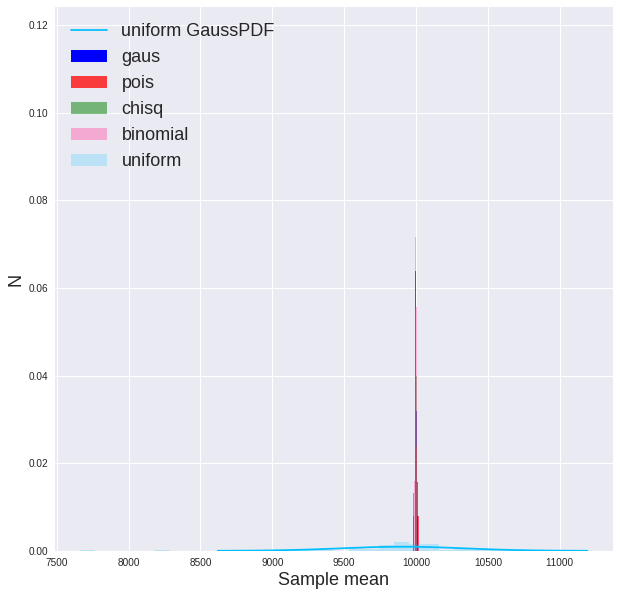

In [11]:

pl.figure(figsize=(10, 10))
#for i in allmeans:
pl.hist(list(allmeans[0]),bins=30, color= 'b', label=distributions[0], normed=True)
pl.hist(list(allmeans[1]),bins=30, color= 'r', alpha = 0.75, label=distributions[1], normed=True)
pl.hist(list(allmeans[2]),bins=30, color= 'g', alpha = 0.5, label=distributions[2], normed=True)
pl.hist(list(allmeans[3]),bins=30, color= 'hotpink', alpha = 0.5, label=distributions[3], normed=True)
pl.hist(list(allmeans[4]),bins=30, color= 'deepskyblue', alpha = 0.2, label=distributions[4], normed=True)

mu4 = mean(allmeans[4]) 
var4 = var(allmeans[4])
sigma4 = math.sqrt(var4)
x = np.linspace(mu4-3*sigma4,mu4+3*sigma4, 100)
plt.plot(x,mlab.normpdf(x, mu4, sigma4), label=distributions[4] + ' GaussPDF', color= 'deepskyblue')

    
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc='upper left', fontsize = 18)


##### Figure 6: Normalised plot of histograms of sample means for previous four distributions, and Uniform distribution

A gaussian is fitted to the distributions of means for the Uniform distribution also. You will observe it is very flat and skewed by outliers as mentioned above, indicating the distribution of mean is more variable than the other distributions.